In [37]:
from bmtk.builder.networks import NetworkBuilder


cortex = NetworkBuilder('cortex')
cortex.add_nodes(
    cell_name='626170421',
    potental='exc',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    model_processing='aibs_perisomatic',
    dynamics_params='fit_parameters.json',
    morphology='reconstruction.swc'
)


In [38]:
cortex.build()
cortex.save_nodes(output_dir='my_sim02/network')

In [39]:
thalamus = NetworkBuilder('mthalamus')
thalamus.add_nodes(
    N=10,
    pop_name='tON',
    potential='exc',
    model_type='virtual'
)

In [40]:
thalamus.add_edges(
    source={'pop_name': 'tON'}, target=cortex.nodes(),
    connection_rule=5,
    syn_weight=0.001,
    delay=2.0,
    weight_function=None,
    target_sections=['basal', 'apical'],
    distance_range=[0.0, 150.0],
    dynamics_params='AMPA_ExcToExc.json',
    model_template='exp2syn'
)

In [41]:
thalamus.build()
thalamus.save_nodes(output_dir='my_sim02/network')
thalamus.save_edges(output_dir='my_sim02/network')

In [42]:
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator

psg = PoissonSpikeGenerator(population='mthalamus')
psg.add(
    node_ids=range(10),  # Have 10 nodes to match mthalamus
    firing_rate=10.0,    # 10 Hz, we can also pass in a nonhomoegenous function/array
    times=(0.0, 3.0)    # Firing starts at 0 s up to 3 s
)
psg.to_sonata('my_sim02/inputs/neuropixel_electrode_1um.csv')

In [43]:
print('Number of spikes: {}'.format(psg.n_spikes()))
print('Units: {}'.format(psg.units()))

psg.to_dataframe().head()

Number of spikes: 299
Units: ms


,node_ids,timestamps,population
0,0,55.827094,mthalamus
1,0,124.655285,mthalamus
2,0,160.269034,mthalamus
3,0,204.960035,mthalamus
4,0,251.210463,mthalamus


In [44]:
from bmtk.utils.sim_setup import build_env_bionet

build_env_bionet(
    base_dir='my_sim02',
    config_file='config.json',
    network_dir='my_sim02/network',
    tstop=3000.0, dt=0.1,
    report_vars=['v', 'cai'],    # Record membrane potential and calcium (default soma)
    spikes_inputs=[('mthalamus', # Name of population which spikes will be generated for
                    'my_sim02/inputs/mthalamus_spikes.h5')],
    include_examples=True,       # Copies components files
    compile_mechanisms=True      # Will try to compile NEURON mechanisms
)

/opt/miniconda3/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


/usr/bin/xcrun
/Users/ninazhang/Desktop/NZ/my_sim02/components/mechanisms
Mod files: "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/SK.mod" "modfiles/modfiles/vecevent.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.dylib
Successfully created x86_64/special


In [45]:
from bmtk.simulator import bionet
from neuron import h

# Initialize ParallelContext
pc = h.ParallelContext()

# Clear any existing gid assignments
if pc.gid_exists(0):  # Check if gid 0 already exists
    pc.gid_clear(0)   # Clear gid 0 if it is assigned

conf = bionet.Config.from_json('my_sim02/config.json')
conf.build_env()
net = bionet.BioNetwork.from_config(conf)
sim = bionet.BioSimulator.from_config(conf, network=net)
sim.run()

# Reset the ParallelContext after the simulation (for subsequent runs)
pc.done()

2024-10-07 14:04:56,305 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


Mechanisms already loaded from path: /Users/ninazhang/Desktop/NZ/my_sim02/components/mechanisms.  Aborting.
2024-10-07 14:04:56,334 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2024-10-07 14:04:56,544 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


2024-10-07 14:04:56,546 [INFO] Building virtual cell stimulations for mthalamus_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for mthalamus_spikes


2024-10-07 14:04:56,573 [INFO] Running simulation for 1000.000 ms with the time step 0.001 ms


INFO:NEURONIOUtils:Running simulation for 1000.000 ms with the time step 0.001 ms


2024-10-07 14:04:56,574 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2024-10-07 14:04:56,574 [INFO] Block save every 5000 steps


INFO:NEURONIOUtils:Block save every 5000 steps


2024-10-07 14:04:56,780 [INFO]     step:5000 t_sim:5.00 ms


INFO:NEURONIOUtils:    step:5000 t_sim:5.00 ms


2024-10-07 14:04:56,961 [INFO]     step:10000 t_sim:10.00 ms


INFO:NEURONIOUtils:    step:10000 t_sim:10.00 ms


2024-10-07 14:04:57,127 [INFO]     step:15000 t_sim:15.00 ms


INFO:NEURONIOUtils:    step:15000 t_sim:15.00 ms


2024-10-07 14:04:57,289 [INFO]     step:20000 t_sim:20.00 ms


INFO:NEURONIOUtils:    step:20000 t_sim:20.00 ms


2024-10-07 14:04:57,444 [INFO]     step:25000 t_sim:25.00 ms


INFO:NEURONIOUtils:    step:25000 t_sim:25.00 ms


2024-10-07 14:04:57,597 [INFO]     step:30000 t_sim:30.00 ms


INFO:NEURONIOUtils:    step:30000 t_sim:30.00 ms


2024-10-07 14:04:57,754 [INFO]     step:35000 t_sim:35.00 ms


INFO:NEURONIOUtils:    step:35000 t_sim:35.00 ms


2024-10-07 14:04:57,911 [INFO]     step:40000 t_sim:40.00 ms


INFO:NEURONIOUtils:    step:40000 t_sim:40.00 ms


2024-10-07 14:04:58,083 [INFO]     step:45000 t_sim:45.00 ms


INFO:NEURONIOUtils:    step:45000 t_sim:45.00 ms


2024-10-07 14:04:58,230 [INFO]     step:50000 t_sim:50.00 ms


INFO:NEURONIOUtils:    step:50000 t_sim:50.00 ms


2024-10-07 14:04:58,376 [INFO]     step:55000 t_sim:55.00 ms


INFO:NEURONIOUtils:    step:55000 t_sim:55.00 ms


2024-10-07 14:04:58,527 [INFO]     step:60000 t_sim:60.00 ms


INFO:NEURONIOUtils:    step:60000 t_sim:60.00 ms


2024-10-07 14:04:58,686 [INFO]     step:65000 t_sim:65.00 ms


INFO:NEURONIOUtils:    step:65000 t_sim:65.00 ms


2024-10-07 14:04:58,837 [INFO]     step:70000 t_sim:70.00 ms


INFO:NEURONIOUtils:    step:70000 t_sim:70.00 ms


2024-10-07 14:04:58,989 [INFO]     step:75000 t_sim:75.00 ms


INFO:NEURONIOUtils:    step:75000 t_sim:75.00 ms


2024-10-07 14:04:59,161 [INFO]     step:80000 t_sim:80.00 ms


INFO:NEURONIOUtils:    step:80000 t_sim:80.00 ms


2024-10-07 14:04:59,308 [INFO]     step:85000 t_sim:85.00 ms


INFO:NEURONIOUtils:    step:85000 t_sim:85.00 ms


2024-10-07 14:04:59,455 [INFO]     step:90000 t_sim:90.00 ms


INFO:NEURONIOUtils:    step:90000 t_sim:90.00 ms


2024-10-07 14:04:59,604 [INFO]     step:95000 t_sim:95.00 ms


INFO:NEURONIOUtils:    step:95000 t_sim:95.00 ms


2024-10-07 14:04:59,764 [INFO]     step:100000 t_sim:100.00 ms


INFO:NEURONIOUtils:    step:100000 t_sim:100.00 ms


2024-10-07 14:04:59,925 [INFO]     step:105000 t_sim:105.00 ms


INFO:NEURONIOUtils:    step:105000 t_sim:105.00 ms


2024-10-07 14:05:00,091 [INFO]     step:110000 t_sim:110.00 ms


INFO:NEURONIOUtils:    step:110000 t_sim:110.00 ms


2024-10-07 14:05:00,263 [INFO]     step:115000 t_sim:115.00 ms


INFO:NEURONIOUtils:    step:115000 t_sim:115.00 ms


2024-10-07 14:05:00,424 [INFO]     step:120000 t_sim:120.00 ms


INFO:NEURONIOUtils:    step:120000 t_sim:120.00 ms


2024-10-07 14:05:00,571 [INFO]     step:125000 t_sim:125.00 ms


INFO:NEURONIOUtils:    step:125000 t_sim:125.00 ms


2024-10-07 14:05:00,720 [INFO]     step:130000 t_sim:130.00 ms


INFO:NEURONIOUtils:    step:130000 t_sim:130.00 ms


2024-10-07 14:05:00,884 [INFO]     step:135000 t_sim:135.00 ms


INFO:NEURONIOUtils:    step:135000 t_sim:135.00 ms


2024-10-07 14:05:01,060 [INFO]     step:140000 t_sim:140.00 ms


INFO:NEURONIOUtils:    step:140000 t_sim:140.00 ms


2024-10-07 14:05:01,213 [INFO]     step:145000 t_sim:145.00 ms


INFO:NEURONIOUtils:    step:145000 t_sim:145.00 ms


2024-10-07 14:05:01,360 [INFO]     step:150000 t_sim:150.00 ms


INFO:NEURONIOUtils:    step:150000 t_sim:150.00 ms


2024-10-07 14:05:01,519 [INFO]     step:155000 t_sim:155.00 ms


INFO:NEURONIOUtils:    step:155000 t_sim:155.00 ms


2024-10-07 14:05:01,667 [INFO]     step:160000 t_sim:160.00 ms


INFO:NEURONIOUtils:    step:160000 t_sim:160.00 ms


2024-10-07 14:05:01,816 [INFO]     step:165000 t_sim:165.00 ms


INFO:NEURONIOUtils:    step:165000 t_sim:165.00 ms


2024-10-07 14:05:01,972 [INFO]     step:170000 t_sim:170.00 ms


INFO:NEURONIOUtils:    step:170000 t_sim:170.00 ms


2024-10-07 14:05:02,133 [INFO]     step:175000 t_sim:175.00 ms


INFO:NEURONIOUtils:    step:175000 t_sim:175.00 ms


2024-10-07 14:05:02,306 [INFO]     step:180000 t_sim:180.00 ms


INFO:NEURONIOUtils:    step:180000 t_sim:180.00 ms


2024-10-07 14:05:02,453 [INFO]     step:185000 t_sim:185.00 ms


INFO:NEURONIOUtils:    step:185000 t_sim:185.00 ms


2024-10-07 14:05:02,604 [INFO]     step:190000 t_sim:190.00 ms


INFO:NEURONIOUtils:    step:190000 t_sim:190.00 ms


2024-10-07 14:05:02,756 [INFO]     step:195000 t_sim:195.00 ms


INFO:NEURONIOUtils:    step:195000 t_sim:195.00 ms


2024-10-07 14:05:02,905 [INFO]     step:200000 t_sim:200.00 ms


INFO:NEURONIOUtils:    step:200000 t_sim:200.00 ms


2024-10-07 14:05:03,067 [INFO]     step:205000 t_sim:205.00 ms


INFO:NEURONIOUtils:    step:205000 t_sim:205.00 ms


2024-10-07 14:05:03,231 [INFO]     step:210000 t_sim:210.00 ms


INFO:NEURONIOUtils:    step:210000 t_sim:210.00 ms


2024-10-07 14:05:03,379 [INFO]     step:215000 t_sim:215.00 ms


INFO:NEURONIOUtils:    step:215000 t_sim:215.00 ms


2024-10-07 14:05:03,525 [INFO]     step:220000 t_sim:220.00 ms


INFO:NEURONIOUtils:    step:220000 t_sim:220.00 ms


2024-10-07 14:05:03,679 [INFO]     step:225000 t_sim:225.00 ms


INFO:NEURONIOUtils:    step:225000 t_sim:225.00 ms


2024-10-07 14:05:03,862 [INFO]     step:230000 t_sim:230.00 ms


INFO:NEURONIOUtils:    step:230000 t_sim:230.00 ms


2024-10-07 14:05:04,012 [INFO]     step:235000 t_sim:235.00 ms


INFO:NEURONIOUtils:    step:235000 t_sim:235.00 ms


2024-10-07 14:05:04,173 [INFO]     step:240000 t_sim:240.00 ms


INFO:NEURONIOUtils:    step:240000 t_sim:240.00 ms


2024-10-07 14:05:04,329 [INFO]     step:245000 t_sim:245.00 ms


INFO:NEURONIOUtils:    step:245000 t_sim:245.00 ms


2024-10-07 14:05:04,488 [INFO]     step:250000 t_sim:250.00 ms


INFO:NEURONIOUtils:    step:250000 t_sim:250.00 ms


2024-10-07 14:05:04,676 [INFO]     step:255000 t_sim:255.00 ms


INFO:NEURONIOUtils:    step:255000 t_sim:255.00 ms


2024-10-07 14:05:04,824 [INFO]     step:260000 t_sim:260.00 ms


INFO:NEURONIOUtils:    step:260000 t_sim:260.00 ms


2024-10-07 14:05:04,988 [INFO]     step:265000 t_sim:265.00 ms


INFO:NEURONIOUtils:    step:265000 t_sim:265.00 ms


2024-10-07 14:05:05,147 [INFO]     step:270000 t_sim:270.00 ms


INFO:NEURONIOUtils:    step:270000 t_sim:270.00 ms


2024-10-07 14:05:05,295 [INFO]     step:275000 t_sim:275.00 ms


INFO:NEURONIOUtils:    step:275000 t_sim:275.00 ms


2024-10-07 14:05:05,444 [INFO]     step:280000 t_sim:280.00 ms


INFO:NEURONIOUtils:    step:280000 t_sim:280.00 ms


2024-10-07 14:05:05,594 [INFO]     step:285000 t_sim:285.00 ms


INFO:NEURONIOUtils:    step:285000 t_sim:285.00 ms


2024-10-07 14:05:05,750 [INFO]     step:290000 t_sim:290.00 ms


INFO:NEURONIOUtils:    step:290000 t_sim:290.00 ms


2024-10-07 14:05:05,913 [INFO]     step:295000 t_sim:295.00 ms


INFO:NEURONIOUtils:    step:295000 t_sim:295.00 ms


2024-10-07 14:05:06,064 [INFO]     step:300000 t_sim:300.00 ms


INFO:NEURONIOUtils:    step:300000 t_sim:300.00 ms


2024-10-07 14:05:06,214 [INFO]     step:305000 t_sim:305.00 ms


INFO:NEURONIOUtils:    step:305000 t_sim:305.00 ms


2024-10-07 14:05:06,363 [INFO]     step:310000 t_sim:310.00 ms


INFO:NEURONIOUtils:    step:310000 t_sim:310.00 ms


2024-10-07 14:05:06,519 [INFO]     step:315000 t_sim:315.00 ms


INFO:NEURONIOUtils:    step:315000 t_sim:315.00 ms


2024-10-07 14:05:06,688 [INFO]     step:320000 t_sim:320.00 ms


INFO:NEURONIOUtils:    step:320000 t_sim:320.00 ms


2024-10-07 14:05:06,866 [INFO]     step:325000 t_sim:325.00 ms


INFO:NEURONIOUtils:    step:325000 t_sim:325.00 ms


2024-10-07 14:05:07,017 [INFO]     step:330000 t_sim:330.00 ms


INFO:NEURONIOUtils:    step:330000 t_sim:330.00 ms


2024-10-07 14:05:07,175 [INFO]     step:335000 t_sim:335.00 ms


INFO:NEURONIOUtils:    step:335000 t_sim:335.00 ms


2024-10-07 14:05:07,329 [INFO]     step:340000 t_sim:340.00 ms


INFO:NEURONIOUtils:    step:340000 t_sim:340.00 ms


2024-10-07 14:05:07,488 [INFO]     step:345000 t_sim:345.00 ms


INFO:NEURONIOUtils:    step:345000 t_sim:345.00 ms


2024-10-07 14:05:07,642 [INFO]     step:350000 t_sim:350.00 ms


INFO:NEURONIOUtils:    step:350000 t_sim:350.00 ms


2024-10-07 14:05:07,804 [INFO]     step:355000 t_sim:355.00 ms


INFO:NEURONIOUtils:    step:355000 t_sim:355.00 ms


2024-10-07 14:05:07,981 [INFO]     step:360000 t_sim:360.00 ms


INFO:NEURONIOUtils:    step:360000 t_sim:360.00 ms


2024-10-07 14:05:08,130 [INFO]     step:365000 t_sim:365.00 ms


INFO:NEURONIOUtils:    step:365000 t_sim:365.00 ms


2024-10-07 14:05:08,282 [INFO]     step:370000 t_sim:370.00 ms


INFO:NEURONIOUtils:    step:370000 t_sim:370.00 ms


2024-10-07 14:05:08,433 [INFO]     step:375000 t_sim:375.00 ms


INFO:NEURONIOUtils:    step:375000 t_sim:375.00 ms


2024-10-07 14:05:08,599 [INFO]     step:380000 t_sim:380.00 ms


INFO:NEURONIOUtils:    step:380000 t_sim:380.00 ms


2024-10-07 14:05:08,754 [INFO]     step:385000 t_sim:385.00 ms


INFO:NEURONIOUtils:    step:385000 t_sim:385.00 ms


2024-10-07 14:05:08,907 [INFO]     step:390000 t_sim:390.00 ms


INFO:NEURONIOUtils:    step:390000 t_sim:390.00 ms


2024-10-07 14:05:09,081 [INFO]     step:395000 t_sim:395.00 ms


INFO:NEURONIOUtils:    step:395000 t_sim:395.00 ms


2024-10-07 14:05:09,236 [INFO]     step:400000 t_sim:400.00 ms


INFO:NEURONIOUtils:    step:400000 t_sim:400.00 ms


2024-10-07 14:05:09,388 [INFO]     step:405000 t_sim:405.00 ms


INFO:NEURONIOUtils:    step:405000 t_sim:405.00 ms


2024-10-07 14:05:09,539 [INFO]     step:410000 t_sim:410.00 ms


INFO:NEURONIOUtils:    step:410000 t_sim:410.00 ms


2024-10-07 14:05:09,697 [INFO]     step:415000 t_sim:415.00 ms


INFO:NEURONIOUtils:    step:415000 t_sim:415.00 ms


2024-10-07 14:05:09,855 [INFO]     step:420000 t_sim:420.00 ms


INFO:NEURONIOUtils:    step:420000 t_sim:420.00 ms


2024-10-07 14:05:10,011 [INFO]     step:425000 t_sim:425.00 ms


INFO:NEURONIOUtils:    step:425000 t_sim:425.00 ms


2024-10-07 14:05:10,172 [INFO]     step:430000 t_sim:430.00 ms


INFO:NEURONIOUtils:    step:430000 t_sim:430.00 ms


2024-10-07 14:05:10,327 [INFO]     step:435000 t_sim:435.00 ms


INFO:NEURONIOUtils:    step:435000 t_sim:435.00 ms


2024-10-07 14:05:10,493 [INFO]     step:440000 t_sim:440.00 ms


INFO:NEURONIOUtils:    step:440000 t_sim:440.00 ms


2024-10-07 14:05:10,663 [INFO]     step:445000 t_sim:445.00 ms


INFO:NEURONIOUtils:    step:445000 t_sim:445.00 ms


2024-10-07 14:05:10,826 [INFO]     step:450000 t_sim:450.00 ms


INFO:NEURONIOUtils:    step:450000 t_sim:450.00 ms


2024-10-07 14:05:10,981 [INFO]     step:455000 t_sim:455.00 ms


INFO:NEURONIOUtils:    step:455000 t_sim:455.00 ms


2024-10-07 14:05:11,139 [INFO]     step:460000 t_sim:460.00 ms


INFO:NEURONIOUtils:    step:460000 t_sim:460.00 ms


2024-10-07 14:05:11,317 [INFO]     step:465000 t_sim:465.00 ms


INFO:NEURONIOUtils:    step:465000 t_sim:465.00 ms


2024-10-07 14:05:11,492 [INFO]     step:470000 t_sim:470.00 ms


INFO:NEURONIOUtils:    step:470000 t_sim:470.00 ms


2024-10-07 14:05:11,666 [INFO]     step:475000 t_sim:475.00 ms


INFO:NEURONIOUtils:    step:475000 t_sim:475.00 ms


2024-10-07 14:05:11,836 [INFO]     step:480000 t_sim:480.00 ms


INFO:NEURONIOUtils:    step:480000 t_sim:480.00 ms


2024-10-07 14:05:12,000 [INFO]     step:485000 t_sim:485.00 ms


INFO:NEURONIOUtils:    step:485000 t_sim:485.00 ms


2024-10-07 14:05:12,164 [INFO]     step:490000 t_sim:490.00 ms


INFO:NEURONIOUtils:    step:490000 t_sim:490.00 ms


2024-10-07 14:05:12,321 [INFO]     step:495000 t_sim:495.00 ms


INFO:NEURONIOUtils:    step:495000 t_sim:495.00 ms


2024-10-07 14:05:12,477 [INFO]     step:500000 t_sim:500.00 ms


INFO:NEURONIOUtils:    step:500000 t_sim:500.00 ms


2024-10-07 14:05:12,662 [INFO]     step:505000 t_sim:505.00 ms


INFO:NEURONIOUtils:    step:505000 t_sim:505.00 ms


2024-10-07 14:05:12,815 [INFO]     step:510000 t_sim:510.00 ms


INFO:NEURONIOUtils:    step:510000 t_sim:510.00 ms


2024-10-07 14:05:12,969 [INFO]     step:515000 t_sim:515.00 ms


INFO:NEURONIOUtils:    step:515000 t_sim:515.00 ms


2024-10-07 14:05:13,118 [INFO]     step:520000 t_sim:520.00 ms


INFO:NEURONIOUtils:    step:520000 t_sim:520.00 ms


2024-10-07 14:05:13,284 [INFO]     step:525000 t_sim:525.00 ms


INFO:NEURONIOUtils:    step:525000 t_sim:525.00 ms


2024-10-07 14:05:13,436 [INFO]     step:530000 t_sim:530.00 ms


INFO:NEURONIOUtils:    step:530000 t_sim:530.00 ms


2024-10-07 14:05:13,601 [INFO]     step:535000 t_sim:535.00 ms


INFO:NEURONIOUtils:    step:535000 t_sim:535.00 ms


2024-10-07 14:05:13,766 [INFO]     step:540000 t_sim:540.00 ms


INFO:NEURONIOUtils:    step:540000 t_sim:540.00 ms


2024-10-07 14:05:13,918 [INFO]     step:545000 t_sim:545.00 ms


INFO:NEURONIOUtils:    step:545000 t_sim:545.00 ms


2024-10-07 14:05:14,072 [INFO]     step:550000 t_sim:550.00 ms


INFO:NEURONIOUtils:    step:550000 t_sim:550.00 ms


2024-10-07 14:05:14,224 [INFO]     step:555000 t_sim:555.00 ms


INFO:NEURONIOUtils:    step:555000 t_sim:555.00 ms


2024-10-07 14:05:14,405 [INFO]     step:560000 t_sim:560.00 ms


INFO:NEURONIOUtils:    step:560000 t_sim:560.00 ms


2024-10-07 14:05:14,557 [INFO]     step:565000 t_sim:565.00 ms


INFO:NEURONIOUtils:    step:565000 t_sim:565.00 ms


2024-10-07 14:05:14,710 [INFO]     step:570000 t_sim:570.00 ms


INFO:NEURONIOUtils:    step:570000 t_sim:570.00 ms


2024-10-07 14:05:14,866 [INFO]     step:575000 t_sim:575.00 ms


INFO:NEURONIOUtils:    step:575000 t_sim:575.00 ms


2024-10-07 14:05:15,025 [INFO]     step:580000 t_sim:580.00 ms


INFO:NEURONIOUtils:    step:580000 t_sim:580.00 ms


2024-10-07 14:05:15,176 [INFO]     step:585000 t_sim:585.00 ms


INFO:NEURONIOUtils:    step:585000 t_sim:585.00 ms


2024-10-07 14:05:15,338 [INFO]     step:590000 t_sim:590.00 ms


INFO:NEURONIOUtils:    step:590000 t_sim:590.00 ms


2024-10-07 14:05:15,489 [INFO]     step:595000 t_sim:595.00 ms


INFO:NEURONIOUtils:    step:595000 t_sim:595.00 ms


2024-10-07 14:05:15,645 [INFO]     step:600000 t_sim:600.00 ms


INFO:NEURONIOUtils:    step:600000 t_sim:600.00 ms


2024-10-07 14:05:15,807 [INFO]     step:605000 t_sim:605.00 ms


INFO:NEURONIOUtils:    step:605000 t_sim:605.00 ms


2024-10-07 14:05:15,973 [INFO]     step:610000 t_sim:610.00 ms


INFO:NEURONIOUtils:    step:610000 t_sim:610.00 ms


2024-10-07 14:05:16,151 [INFO]     step:615000 t_sim:615.00 ms


INFO:NEURONIOUtils:    step:615000 t_sim:615.00 ms


2024-10-07 14:05:16,304 [INFO]     step:620000 t_sim:620.00 ms


INFO:NEURONIOUtils:    step:620000 t_sim:620.00 ms


2024-10-07 14:05:16,458 [INFO]     step:625000 t_sim:625.00 ms


INFO:NEURONIOUtils:    step:625000 t_sim:625.00 ms


2024-10-07 14:05:16,611 [INFO]     step:630000 t_sim:630.00 ms


INFO:NEURONIOUtils:    step:630000 t_sim:630.00 ms


2024-10-07 14:05:16,763 [INFO]     step:635000 t_sim:635.00 ms


INFO:NEURONIOUtils:    step:635000 t_sim:635.00 ms


2024-10-07 14:05:16,925 [INFO]     step:640000 t_sim:640.00 ms


INFO:NEURONIOUtils:    step:640000 t_sim:640.00 ms


2024-10-07 14:05:17,080 [INFO]     step:645000 t_sim:645.00 ms


INFO:NEURONIOUtils:    step:645000 t_sim:645.00 ms


2024-10-07 14:05:17,242 [INFO]     step:650000 t_sim:650.00 ms


INFO:NEURONIOUtils:    step:650000 t_sim:650.00 ms


2024-10-07 14:05:17,427 [INFO]     step:655000 t_sim:655.00 ms


INFO:NEURONIOUtils:    step:655000 t_sim:655.00 ms


2024-10-07 14:05:17,578 [INFO]     step:660000 t_sim:660.00 ms


INFO:NEURONIOUtils:    step:660000 t_sim:660.00 ms


2024-10-07 14:05:17,729 [INFO]     step:665000 t_sim:665.00 ms


INFO:NEURONIOUtils:    step:665000 t_sim:665.00 ms


2024-10-07 14:05:17,905 [INFO]     step:670000 t_sim:670.00 ms


INFO:NEURONIOUtils:    step:670000 t_sim:670.00 ms


2024-10-07 14:05:18,056 [INFO]     step:675000 t_sim:675.00 ms


INFO:NEURONIOUtils:    step:675000 t_sim:675.00 ms


2024-10-07 14:05:18,213 [INFO]     step:680000 t_sim:680.00 ms


INFO:NEURONIOUtils:    step:680000 t_sim:680.00 ms


2024-10-07 14:05:18,366 [INFO]     step:685000 t_sim:685.00 ms


INFO:NEURONIOUtils:    step:685000 t_sim:685.00 ms


2024-10-07 14:05:18,534 [INFO]     step:690000 t_sim:690.00 ms


INFO:NEURONIOUtils:    step:690000 t_sim:690.00 ms


2024-10-07 14:05:18,692 [INFO]     step:695000 t_sim:695.00 ms


INFO:NEURONIOUtils:    step:695000 t_sim:695.00 ms


2024-10-07 14:05:18,845 [INFO]     step:700000 t_sim:700.00 ms


INFO:NEURONIOUtils:    step:700000 t_sim:700.00 ms


2024-10-07 14:05:19,017 [INFO]     step:705000 t_sim:705.00 ms


INFO:NEURONIOUtils:    step:705000 t_sim:705.00 ms


2024-10-07 14:05:19,199 [INFO]     step:710000 t_sim:710.00 ms


INFO:NEURONIOUtils:    step:710000 t_sim:710.00 ms


2024-10-07 14:05:19,353 [INFO]     step:715000 t_sim:715.00 ms


INFO:NEURONIOUtils:    step:715000 t_sim:715.00 ms


2024-10-07 14:05:19,526 [INFO]     step:720000 t_sim:720.00 ms


INFO:NEURONIOUtils:    step:720000 t_sim:720.00 ms


2024-10-07 14:05:19,703 [INFO]     step:725000 t_sim:725.00 ms


INFO:NEURONIOUtils:    step:725000 t_sim:725.00 ms


2024-10-07 14:05:19,867 [INFO]     step:730000 t_sim:730.00 ms


INFO:NEURONIOUtils:    step:730000 t_sim:730.00 ms


2024-10-07 14:05:20,023 [INFO]     step:735000 t_sim:735.00 ms


INFO:NEURONIOUtils:    step:735000 t_sim:735.00 ms


2024-10-07 14:05:20,186 [INFO]     step:740000 t_sim:740.00 ms


INFO:NEURONIOUtils:    step:740000 t_sim:740.00 ms


2024-10-07 14:05:20,354 [INFO]     step:745000 t_sim:745.00 ms


INFO:NEURONIOUtils:    step:745000 t_sim:745.00 ms


2024-10-07 14:05:20,512 [INFO]     step:750000 t_sim:750.00 ms


INFO:NEURONIOUtils:    step:750000 t_sim:750.00 ms


2024-10-07 14:05:20,678 [INFO]     step:755000 t_sim:755.00 ms


INFO:NEURONIOUtils:    step:755000 t_sim:755.00 ms


2024-10-07 14:05:20,844 [INFO]     step:760000 t_sim:760.00 ms


INFO:NEURONIOUtils:    step:760000 t_sim:760.00 ms


2024-10-07 14:05:20,998 [INFO]     step:765000 t_sim:765.00 ms


INFO:NEURONIOUtils:    step:765000 t_sim:765.00 ms


2024-10-07 14:05:21,156 [INFO]     step:770000 t_sim:770.00 ms


INFO:NEURONIOUtils:    step:770000 t_sim:770.00 ms


2024-10-07 14:05:21,310 [INFO]     step:775000 t_sim:775.00 ms


INFO:NEURONIOUtils:    step:775000 t_sim:775.00 ms


2024-10-07 14:05:21,493 [INFO]     step:780000 t_sim:780.00 ms


INFO:NEURONIOUtils:    step:780000 t_sim:780.00 ms


2024-10-07 14:05:21,648 [INFO]     step:785000 t_sim:785.00 ms


INFO:NEURONIOUtils:    step:785000 t_sim:785.00 ms


2024-10-07 14:05:21,804 [INFO]     step:790000 t_sim:790.00 ms


INFO:NEURONIOUtils:    step:790000 t_sim:790.00 ms


2024-10-07 14:05:21,964 [INFO]     step:795000 t_sim:795.00 ms


INFO:NEURONIOUtils:    step:795000 t_sim:795.00 ms


2024-10-07 14:05:22,117 [INFO]     step:800000 t_sim:800.00 ms


INFO:NEURONIOUtils:    step:800000 t_sim:800.00 ms


2024-10-07 14:05:22,295 [INFO]     step:805000 t_sim:805.00 ms


INFO:NEURONIOUtils:    step:805000 t_sim:805.00 ms


2024-10-07 14:05:22,444 [INFO]     step:810000 t_sim:810.00 ms


INFO:NEURONIOUtils:    step:810000 t_sim:810.00 ms


2024-10-07 14:05:22,608 [INFO]     step:815000 t_sim:815.00 ms


INFO:NEURONIOUtils:    step:815000 t_sim:815.00 ms


2024-10-07 14:05:22,759 [INFO]     step:820000 t_sim:820.00 ms


INFO:NEURONIOUtils:    step:820000 t_sim:820.00 ms


2024-10-07 14:05:22,917 [INFO]     step:825000 t_sim:825.00 ms


INFO:NEURONIOUtils:    step:825000 t_sim:825.00 ms


2024-10-07 14:05:23,093 [INFO]     step:830000 t_sim:830.00 ms


INFO:NEURONIOUtils:    step:830000 t_sim:830.00 ms


2024-10-07 14:05:23,249 [INFO]     step:835000 t_sim:835.00 ms


INFO:NEURONIOUtils:    step:835000 t_sim:835.00 ms


2024-10-07 14:05:23,431 [INFO]     step:840000 t_sim:840.00 ms


INFO:NEURONIOUtils:    step:840000 t_sim:840.00 ms


2024-10-07 14:05:23,589 [INFO]     step:845000 t_sim:845.00 ms


INFO:NEURONIOUtils:    step:845000 t_sim:845.00 ms


2024-10-07 14:05:23,757 [INFO]     step:850000 t_sim:850.00 ms


INFO:NEURONIOUtils:    step:850000 t_sim:850.00 ms


2024-10-07 14:05:23,909 [INFO]     step:855000 t_sim:855.00 ms


INFO:NEURONIOUtils:    step:855000 t_sim:855.00 ms


2024-10-07 14:05:24,067 [INFO]     step:860000 t_sim:860.00 ms


INFO:NEURONIOUtils:    step:860000 t_sim:860.00 ms


2024-10-07 14:05:24,222 [INFO]     step:865000 t_sim:865.00 ms


INFO:NEURONIOUtils:    step:865000 t_sim:865.00 ms


2024-10-07 14:05:24,378 [INFO]     step:870000 t_sim:870.00 ms


INFO:NEURONIOUtils:    step:870000 t_sim:870.00 ms


2024-10-07 14:05:24,559 [INFO]     step:875000 t_sim:875.00 ms


INFO:NEURONIOUtils:    step:875000 t_sim:875.00 ms


2024-10-07 14:05:24,720 [INFO]     step:880000 t_sim:880.00 ms


INFO:NEURONIOUtils:    step:880000 t_sim:880.00 ms


2024-10-07 14:05:24,886 [INFO]     step:885000 t_sim:885.00 ms


INFO:NEURONIOUtils:    step:885000 t_sim:885.00 ms


2024-10-07 14:05:25,039 [INFO]     step:890000 t_sim:890.00 ms


INFO:NEURONIOUtils:    step:890000 t_sim:890.00 ms


2024-10-07 14:05:25,208 [INFO]     step:895000 t_sim:895.00 ms


INFO:NEURONIOUtils:    step:895000 t_sim:895.00 ms


2024-10-07 14:05:25,371 [INFO]     step:900000 t_sim:900.00 ms


INFO:NEURONIOUtils:    step:900000 t_sim:900.00 ms


2024-10-07 14:05:25,535 [INFO]     step:905000 t_sim:905.00 ms


INFO:NEURONIOUtils:    step:905000 t_sim:905.00 ms


2024-10-07 14:05:25,704 [INFO]     step:910000 t_sim:910.00 ms


INFO:NEURONIOUtils:    step:910000 t_sim:910.00 ms


2024-10-07 14:05:25,860 [INFO]     step:915000 t_sim:915.00 ms


INFO:NEURONIOUtils:    step:915000 t_sim:915.00 ms


2024-10-07 14:05:26,021 [INFO]     step:920000 t_sim:920.00 ms


INFO:NEURONIOUtils:    step:920000 t_sim:920.00 ms


2024-10-07 14:05:26,175 [INFO]     step:925000 t_sim:925.00 ms


INFO:NEURONIOUtils:    step:925000 t_sim:925.00 ms


2024-10-07 14:05:26,332 [INFO]     step:930000 t_sim:930.00 ms


INFO:NEURONIOUtils:    step:930000 t_sim:930.00 ms


2024-10-07 14:05:26,490 [INFO]     step:935000 t_sim:935.00 ms


INFO:NEURONIOUtils:    step:935000 t_sim:935.00 ms


2024-10-07 14:05:26,679 [INFO]     step:940000 t_sim:940.00 ms


INFO:NEURONIOUtils:    step:940000 t_sim:940.00 ms


2024-10-07 14:05:26,830 [INFO]     step:945000 t_sim:945.00 ms


INFO:NEURONIOUtils:    step:945000 t_sim:945.00 ms


2024-10-07 14:05:27,013 [INFO]     step:950000 t_sim:950.00 ms


INFO:NEURONIOUtils:    step:950000 t_sim:950.00 ms


2024-10-07 14:05:27,178 [INFO]     step:955000 t_sim:955.00 ms


INFO:NEURONIOUtils:    step:955000 t_sim:955.00 ms


2024-10-07 14:05:27,338 [INFO]     step:960000 t_sim:960.00 ms


INFO:NEURONIOUtils:    step:960000 t_sim:960.00 ms


2024-10-07 14:05:27,495 [INFO]     step:965000 t_sim:965.00 ms


INFO:NEURONIOUtils:    step:965000 t_sim:965.00 ms


2024-10-07 14:05:27,667 [INFO]     step:970000 t_sim:970.00 ms


INFO:NEURONIOUtils:    step:970000 t_sim:970.00 ms


2024-10-07 14:05:27,828 [INFO]     step:975000 t_sim:975.00 ms


INFO:NEURONIOUtils:    step:975000 t_sim:975.00 ms


2024-10-07 14:05:27,985 [INFO]     step:980000 t_sim:980.00 ms


INFO:NEURONIOUtils:    step:980000 t_sim:980.00 ms


2024-10-07 14:05:28,137 [INFO]     step:985000 t_sim:985.00 ms


INFO:NEURONIOUtils:    step:985000 t_sim:985.00 ms


2024-10-07 14:05:28,296 [INFO]     step:990000 t_sim:990.00 ms


INFO:NEURONIOUtils:    step:990000 t_sim:990.00 ms


2024-10-07 14:05:28,479 [INFO]     step:995000 t_sim:995.00 ms


INFO:NEURONIOUtils:    step:995000 t_sim:995.00 ms


2024-10-07 14:05:28,629 [INFO]     step:1000000 t_sim:1000.00 ms


INFO:NEURONIOUtils:    step:1000000 t_sim:1000.00 ms


2024-10-07 14:05:28,648 [INFO] Simulation completed in 32.08 seconds 


INFO:NEURONIOUtils:Simulation completed in 32.08 seconds 


0.0

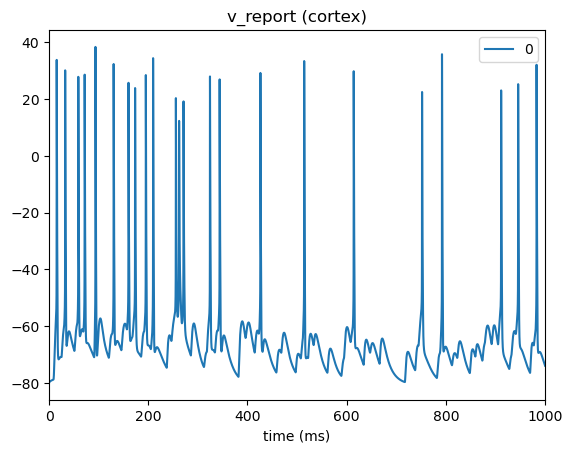

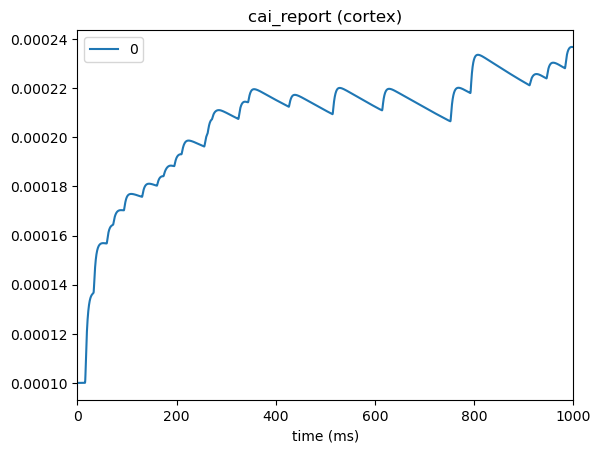

In [46]:
from bmtk.analyzer.compartment import plot_traces

_ = plot_traces(config_file='my_sim02/config.json', node_ids=[0], report_name='v_report')
_ = plot_traces(config_file='my_sim02/config.json', node_ids=[0], report_name='cai_report')
